In [10]:
from matplotlib import pyplot as plt

%matplotlib ipympl

plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['font.size'] = 16
# 用来正常显示中文标签
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei'] 
plt.rcParams['figure.autolayout'] = True
# 用来正常显示负号
plt.rcParams['axes.unicode_minus'] = False 
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0

In [2]:
import numpy as np
import pandas as pd
import pylatex
pd.set_option('precision', 2)

from calculate_increases import *
from parse_data import *

In [3]:
benchmark_max_stack_usages = parse_profile_data_in_directory_to_dataframe(
    parse_json_format_profile_data_directory('benchmark_max_stack_usages', 'stack_size'),
    'max_stack_usage',
    True
)

benchmark_instruction_counts = parse_profile_data_in_directory_to_dataframe(
    parse_benchmark_instruction_counts_directory('benchmark_instruction_counts'),
    'instruction_count',
    True
)

benchmark_writes_on_hottest_stack_addresses = parse_profile_data_in_directory_to_dataframe(
    parse_json_format_profile_data_directory('benchmark_writes_on_hottest_stack_addresses', 'writes'),
    'writes_on_hottest_stack_address',
    True
)

max_number_of_stack_frames_on_a_stack_address = parse_profile_data_in_directory_to_dataframe(
    parse_json_format_profile_data_directory('max_number_of_stack_frames_on_a_stack_address', 'number_of_stack_frames'),
    'max_number_of_stack_frames_on_a_stack_address',
    True
)

writes_on_hottest_address_in_stack_frames = parse_profile_data_in_directory_to_dataframe(
    parse_json_format_profile_data_directory('writes_on_hottest_address_in_stack_frames', 'writes'),
    'writes_on_hottest_address_in_stack_frames',
    True
)

In [4]:
executable_type_renaming = {
    'baseline': 'No Wear Leveling',
    'unoptimized_loop2recursion': 'Unoptimized',
    'new_loop2recursion': 'Optimized'
}

In [5]:
baseline_loop2recursion_new_loop2recursion_benchmark_max_stack_usages = benchmark_max_stack_usages[
    benchmark_max_stack_usages['executable_type'].isin(executable_type_renaming)
].sort_values(
    by=['benchmark', 'executable_type']
).replace(
    to_replace=executable_type_renaming
)

baseline_loop2recursion_new_loop2recursion_benchmark_max_stack_usages

,executable_type,benchmark,max_stack_usage
251,No Wear Leveling,average,6.24e+05
264,Optimized,average,4.49e+06
248,Unoptimized,average,8.25e+06
57,No Wear Leveling,basicmath.json,2.78e+03
226,Optimized,basicmath.json,3.38e+04
18,Unoptimized,basicmath.json,4.98e+04
59,No Wear Leveling,bf.json,9.18e+03
228,Optimized,bf.json,2.62e+05
20,Unoptimized,bf.json,1.39e+06
60,No Wear Leveling,bitcnts.json,2.74e+03


In [6]:
maximum_stack_usages_of_unoptimized_and_optimized_loop2recursion = calculate_increases(
    baseline_loop2recursion_new_loop2recursion_benchmark_max_stack_usages, 'Unoptimized', ['Optimized'], 'max_stack_usage', lambda executable_type: f'{executable_type} Change'
).to_latex(
    formatters={
        f'{executable_type} Change': '{:,.2%}'.format
        for executable_type in executable_type_renaming.values()
    },
    caption='Maximum Stack Usages of Unoptimized and Optimized Loop2Recursion',
    label='table:maximum_stack_usages_of_unoptimized_and_optimized_loop2recursion',
    index=False
)

print(maximum_stack_usages_of_unoptimized_and_optimized_loop2recursion)

\begin{table}
\centering
\caption{Maximum Stack Usages of Unoptimized and Optimized Loop2Recursion}
\label{table:maximum_stack_usages_of_unoptimized_and_optimized_loop2recursion}
\begin{tabular}{lrr}
\toprule
     benchmark &  Unoptimized & Optimized Change \\
\midrule
       average &     8.25e+06 &          -45.54\% \\
basicmath.json &     4.98e+04 &          -32.16\% \\
       bf.json &     1.39e+06 &          -81.20\% \\
  bitcnts.json &     7.20e+06 &          -33.33\% \\
   crc\_32.json &     8.76e+07 &          -50.00\% \\
 dijkstra.json &     1.02e+05 &          -46.63\% \\
      fft.json &     4.59e+05 &          -57.09\% \\
 patricia.json &     1.22e+06 &          -57.00\% \\
  pbmsrch.json &     1.34e+04 &          -19.02\% \\
    qsort.json &     8.32e+06 &           -3.85\% \\
rawcaudio.json &     2.30e+05 &          -18.71\% \\
rawdaudio.json &     1.82e+05 &          -14.85\% \\
      sha.json &     9.04e+04 &          -80.29\% \\
    susan.json &     4.19e+05 &         

In [7]:
baseline_loop2recursion_new_loop2recursion_benchmark_instruction_counts = benchmark_instruction_counts[
    benchmark_instruction_counts['executable_type'].isin(executable_type_renaming)
].sort_values(
    by=['benchmark', 'executable_type']
).replace(
    to_replace=executable_type_renaming
)

baseline_loop2recursion_new_loop2recursion_benchmark_instruction_counts

,executable_type,benchmark,instruction_count
251,No Wear Leveling,average,6.00e+07
264,Optimized,average,5.90e+07
248,Unoptimized,average,6.63e+07
64,No Wear Leveling,basicmath,4.98e+07
233,Optimized,basicmath,4.97e+07
25,Unoptimized,basicmath,5.01e+07
52,No Wear Leveling,bf,5.34e+07
221,Optimized,bf,5.62e+07
13,Unoptimized,bf,7.95e+07
53,No Wear Leveling,bitcnts,1.07e+08


In [8]:
instruction_counts_of_unoptimized_and_optimized_loop2recursion = calculate_increases(
    baseline_loop2recursion_new_loop2recursion_benchmark_instruction_counts, 'Unoptimized', ['Optimized'], 'instruction_count', lambda executable_type: f'{executable_type} Change'
).to_latex(
    formatters={
        f'{executable_type} Change': '{:,.2%}'.format
        for executable_type in executable_type_renaming.values()
    },
    caption='Instruction Counts of Unoptimized and Optimized Loop2Recursion',
    label='table:instruction_counts_of_unoptimized_and_optimized_loop2recursion',
    index=False
)

print(instruction_counts_of_unoptimized_and_optimized_loop2recursion)

\begin{table}
\centering
\caption{Instruction Counts of Unoptimized and Optimized Loop2Recursion}
\label{table:instruction_counts_of_unoptimized_and_optimized_loop2recursion}
\begin{tabular}{lrr}
\toprule
benchmark &  Unoptimized & Optimized Change \\
\midrule
  average &     6.63e+07 &          -11.02\% \\
basicmath &     5.01e+07 &           -0.92\% \\
       bf &     7.95e+07 &          -29.36\% \\
  bitcnts &     1.15e+08 &          -10.28\% \\
   crc\_32 &     5.89e+07 &          -13.94\% \\
 dijkstra &     1.34e+08 &          -13.01\% \\
      fft &     3.11e+07 &           -2.05\% \\
 patricia &     7.31e+07 &           -0.83\% \\
  pbmsrch &     1.42e+05 &            1.61\% \\
    qsort &     1.50e+07 &           -1.23\% \\
rawcaudio &     1.03e+08 &           -2.01\% \\
rawdaudio &     8.26e+07 &           -3.33\% \\
      sha &     2.49e+07 &           -9.30\% \\
    susan &     9.37e+07 &          -26.74\% \\
\bottomrule
\end{tabular}
\end{table}



In [9]:
baseline_loop2recursion_new_loop2recursion_benchmark_writes_on_hottest_stack_addresses = benchmark_writes_on_hottest_stack_addresses[
    benchmark_writes_on_hottest_stack_addresses['executable_type'].isin(executable_type_renaming)
].sort_values(
    by=['benchmark', 'executable_type']
).replace(
    to_replace=executable_type_renaming
)

baseline_loop2recursion_new_loop2recursion_benchmark_writes_on_hottest_stack_addresses

,executable_type,benchmark,writes_on_hottest_stack_address
251,No Wear Leveling,average,1.90e+06
264,Optimized,average,1.29e+05
248,Unoptimized,average,1.27e+05
57,No Wear Leveling,basicmath.json,3.73e+05
226,Optimized,basicmath.json,5.60e+04
18,Unoptimized,basicmath.json,3.60e+04
59,No Wear Leveling,bf.json,1.28e+06
228,Optimized,bf.json,1.56e+05
20,Unoptimized,bf.json,1.56e+05
60,No Wear Leveling,bitcnts.json,7.30e+06


In [11]:
writes_on_hottest_stack_address_of_unoptimized_and_optimized_loop2recursion = calculate_increases(
    baseline_loop2recursion_new_loop2recursion_benchmark_writes_on_hottest_stack_addresses, 'Unoptimized', ['Optimized'], 'writes_on_hottest_stack_address', lambda executable_type: f'{executable_type} Change'
).to_latex(
    formatters={
        f'{executable_type} Change': '{:,.2%}'.format
        for executable_type in executable_type_renaming.values()
    },
    caption='Writes on Hottest Stack Address of Unoptimized and Optimized Loop2Recursion',
    label='table:writes_on_hottest_stack_address_of_unoptimized_and_optimized_loop2recursion',
    index=False
)

print(writes_on_hottest_stack_address_of_unoptimized_and_optimized_loop2recursion)

\begin{table}
\centering
\caption{Writes on Hottest Stack Address of Unoptimized and Optimized Loop2Recursion}
\label{table:writes_on_hottest_stack_address_of_unoptimized_and_optimized_loop2recursion}
\begin{tabular}{lrr}
\toprule
     benchmark &  Unoptimized & Optimized Change \\
\midrule
       average &     1.27e+05 &            1.65\% \\
basicmath.json &     3.60e+04 &           55.55\% \\
       bf.json &     1.56e+05 &            0.00\% \\
  bitcnts.json &     9.40e+01 &           28.72\% \\
   crc\_32.json &     1.37e+06 &            0.00\% \\
 dijkstra.json &     1.00e+04 &            6.77\% \\
      fft.json &     5.70e+02 &           36.14\% \\
 patricia.json &     2.18e+04 &            0.00\% \\
  pbmsrch.json &     5.20e+01 &           17.31\% \\
    qsort.json &     2.30e+04 &            0.06\% \\
rawcaudio.json &     1.25e+03 &           13.39\% \\
rawdaudio.json &     1.37e+03 &            6.64\% \\
      sha.json &     1.46e+04 &            0.00\% \\
    susan.json &  

In [12]:
writes_on_hottest_stack_address_of_unoptimized_and_optimized_loop2recursion = calculate_increases(
    baseline_loop2recursion_new_loop2recursion_benchmark_writes_on_hottest_stack_addresses,'No Wear Leveling' , ['Unoptimized', 'Optimized'], 'writes_on_hottest_stack_address', lambda executable_type: f'{executable_type} Change'
).to_latex(
    formatters={
        f'{executable_type} Change': '{:,.2%}'.format
        for executable_type in executable_type_renaming.values()
    },
    caption='Writes on Hottest Stack Address of No Wear Leveling, Unoptimized, and Optimized Loop2Recursion',
    label='table:writes_on_hottest_stack_address_of_no_wear_leveling_unoptimized_and_optimized_loop2recursion',
    index=False
)

print(writes_on_hottest_stack_address_of_unoptimized_and_optimized_loop2recursion)

\begin{table}
\centering
\caption{Writes on Hottest Stack Address of No Wear Leveling, Unoptimized, and Optimized Loop2Recursion}
\label{table:writes_on_hottest_stack_address_of_no_wear_leveling_unoptimized_and_optimized_loop2recursion}
\begin{tabular}{lrrr}
\toprule
     benchmark &  No Wear Leveling & Unoptimized Change & Optimized Change \\
\midrule
       average &          1.90e+06 &            -93.33\% &          -93.22\% \\
basicmath.json &          3.73e+05 &            -90.35\% &          -84.99\% \\
       bf.json &          1.28e+06 &            -87.81\% &          -87.81\% \\
  bitcnts.json &          7.30e+06 &           -100.00\% &         -100.00\% \\
   crc\_32.json &          2.74e+06 &            -50.01\% &          -50.01\% \\
 dijkstra.json &          4.51e+06 &            -99.78\% &          -99.76\% \\
      fft.json &          3.04e+05 &            -99.81\% &          -99.74\% \\
 patricia.json &          3.86e+05 &            -94.36\% &          -94.36\% \\
  pb

In [13]:
baseline_loop2recursion_new_loop2recursion_max_number_of_stack_frames_on_a_stack_address = max_number_of_stack_frames_on_a_stack_address[
    max_number_of_stack_frames_on_a_stack_address['executable_type'].isin(executable_type_renaming)
].sort_values(
    by=['benchmark', 'executable_type']
).replace(
    to_replace=executable_type_renaming
)

baseline_loop2recursion_new_loop2recursion_max_number_of_stack_frames_on_a_stack_address

,executable_type,benchmark,max_number_of_stack_frames_on_a_stack_address


In [14]:
maximum_number_of_stack_frames_allocated_on_a_stack_address_of_unoptimized_and_optimized_loop2recursion = calculate_increases(
    baseline_loop2recursion_new_loop2recursion_max_number_of_stack_frames_on_a_stack_address, 'Unoptimized', ['Optimized'], 'max_number_of_stack_frames_on_a_stack_address', lambda executable_type: f'{executable_type} Change'
).to_latex(
    formatters={
        f'{executable_type} Change': '{:,.2%}'.format
        for executable_type in executable_type_renaming.values()
    },
    caption='Maximum Number of Stack Frames Allocated on a Stack Address of Unoptimized and Optimized Loop2Recursion',
    label='table:maximum_number_of_stack_frames_allocated_on_a_stack_address_of_unoptimized_and_optimized_loop2recursion',
    index=False
)

print(maximum_number_of_stack_frames_allocated_on_a_stack_address_of_unoptimized_and_optimized_loop2recursion)

\begin{table}
\centering
\caption{Maximum Number of Stack Frames Allocated on a Stack Address of Unoptimized and Optimized Loop2Recursion}
\label{table:maximum_number_of_stack_frames_allocated_on_a_stack_address_of_unoptimized_and_optimized_loop2recursion}
\begin{tabular}{rrr}
\toprule
Empty DataFrame
Columns: Index(['benchmark', 'Unoptimized', 'Optimized Change'], dtype='object')
Index: RangeIndex(start=0, stop=0, step=1) \\
\bottomrule
\end{tabular}
\end{table}



In [15]:
baseline_loop2recursion_new_loop2recursion_writes_on_hottest_address_in_stack_frames = writes_on_hottest_address_in_stack_frames[
    writes_on_hottest_address_in_stack_frames['executable_type'].isin(executable_type_renaming)
].sort_values(
    by=['benchmark', 'executable_type']
).replace(
    to_replace=executable_type_renaming
)

baseline_loop2recursion_new_loop2recursion_writes_on_hottest_address_in_stack_frames

,executable_type,benchmark,writes_on_hottest_address_in_stack_frames


In [16]:
maximum_number_of_writes_on_a_memory_address_in_stack_frames_of_unoptimized_and_optimized_loop2recursion = calculate_increases(
    baseline_loop2recursion_new_loop2recursion_writes_on_hottest_address_in_stack_frames, 'Unoptimized', ['Optimized'], 'writes_on_hottest_address_in_stack_frames', lambda executable_type: f'{executable_type} Change'
).to_latex(
    formatters={
        f'{executable_type} Change': '{:,.2%}'.format
        for executable_type in executable_type_renaming.values()
    },
    caption='Maximum Number of Writes on a Memory Address in Stack Frames of Unoptimized and Optimized Loop2Recursion',
    label='table:maximum_number_of_writes_on_a_memory_address_in_stack_frames_of_unoptimized_and_optimized_loop2recursion',
    index=False
)

print(maximum_number_of_writes_on_a_memory_address_in_stack_frames_of_unoptimized_and_optimized_loop2recursion)

\begin{table}
\centering
\caption{Maximum Number of Writes on a Memory Address in Stack Frames of Unoptimized and Optimized Loop2Recursion}
\label{table:maximum_number_of_writes_on_a_memory_address_in_stack_frames_of_unoptimized_and_optimized_loop2recursion}
\begin{tabular}{rrr}
\toprule
Empty DataFrame
Columns: Index(['benchmark', 'Unoptimized', 'Optimized Change'], dtype='object')
Index: RangeIndex(start=0, stop=0, step=1) \\
\bottomrule
\end{tabular}
\end{table}



In [16]:
import re

In [17]:
def f(types_of_benchmarks):
    unoptimized_loop2recursion_recursion_depth_limit_benchmark_type_pattern = re.compile(r'unoptimized_loop2recursion-recursion_depth_limit-(\d+)')
    for benchmark_type in types_of_benchmarks:
        match = unoptimized_loop2recursion_recursion_depth_limit_benchmark_type_pattern.match(benchmark_type)
        if match:
            unoptimized_loop2recursion_recursion_depth_limit_string, *_ = match.groups()
            unoptimized_loop2recursion_recursion_depth_limit = int(unoptimized_loop2recursion_recursion_depth_limit_string)
            yield unoptimized_loop2recursion_recursion_depth_limit

In [19]:
unoptimized_loop2recursion_recursion_depth_limit_list = list(f(benchmark_max_stack_usages['executable_type'].unique()))
unoptimized_loop2recursion_recursion_depth_limit_list.sort()
unoptimized_loop2recursion_recursion_depth_limit_list = [i for i in unoptimized_loop2recursion_recursion_depth_limit_list if i < 128]
unoptimized_loop2recursion_recursion_depth_limit_list

[8, 16, 32, 64]

In [20]:
import math

unoptimized_loop2recursion_recursion_depth_limit_executable_types_and_orders = {
        f'unoptimized_loop2recursion-recursion_depth_limit-{unoptimized_loop2recursion_recursion_depth_limit}': unoptimized_loop2recursion_recursion_depth_limit
        for unoptimized_loop2recursion_recursion_depth_limit in unoptimized_loop2recursion_recursion_depth_limit_list
}

unoptimized_loop2recursion_recursion_depth_limit_executable_types_and_orders[
    'unoptimized_loop2recursion'
] = math.inf

unoptimized_loop2recursion_recursion_depth_limit_executable_types_and_orders

{'unoptimized_loop2recursion-recursion_depth_limit-8': 8,
 'unoptimized_loop2recursion-recursion_depth_limit-16': 16,
 'unoptimized_loop2recursion-recursion_depth_limit-32': 32,
 'unoptimized_loop2recursion-recursion_depth_limit-64': 64,
 'unoptimized_loop2recursion': inf}

In [21]:
unoptimized_loop2recursion_recursion_depth_limit_benchmark_max_stack_usages = benchmark_max_stack_usages[
    benchmark_max_stack_usages['executable_type'].isin(
        unoptimized_loop2recursion_recursion_depth_limit_executable_types_and_orders
    )
].copy()

unoptimized_loop2recursion_recursion_depth_limit_benchmark_max_stack_usages['executable_type_order'] = unoptimized_loop2recursion_recursion_depth_limit_benchmark_max_stack_usages[
    'executable_type'
].map(unoptimized_loop2recursion_recursion_depth_limit_executable_types_and_orders)

unoptimized_loop2recursion_recursion_depth_limit_benchmark_max_stack_usages.sort_values(by=['benchmark', 'executable_type_order'], inplace=True)

unoptimized_loop2recursion_recursion_depth_limit_benchmark_max_stack_usages

,executable_type,benchmark,max_stack_usage,executable_type_order
265,unoptimized_loop2recursion-recursion_depth_lim...,average,6.26e+05,8.0
260,unoptimized_loop2recursion-recursion_depth_lim...,average,6.29e+05,16.0
249,unoptimized_loop2recursion-recursion_depth_lim...,average,6.34e+05,32.0
255,unoptimized_loop2recursion-recursion_depth_lim...,average,6.43e+05,64.0
248,unoptimized_loop2recursion,average,8.25e+06,inf
...,...,...,...,...
243,unoptimized_loop2recursion-recursion_depth_lim...,susan.json,3.73e+05,8.0
178,unoptimized_loop2recursion-recursion_depth_lim...,susan.json,3.84e+05,16.0
35,unoptimized_loop2recursion-recursion_depth_lim...,susan.json,3.97e+05,32.0
113,unoptimized_loop2recursion-recursion_depth_lim...,susan.json,4.26e+05,64.0


In [22]:
average_unoptimized_loop2recursion_recursion_depth_limit_benchmark_max_stack_usages = unoptimized_loop2recursion_recursion_depth_limit_benchmark_max_stack_usages[
    unoptimized_loop2recursion_recursion_depth_limit_benchmark_max_stack_usages['benchmark'] == 'average'
]['max_stack_usage'].values[:-1]
average_unoptimized_loop2recursion_recursion_depth_limit_benchmark_max_stack_usages

array([626411.07692308, 629235.69230769, 634029.53846154, 643025.23076923])

In [23]:
unoptimized_loop2recursion_recursion_depth_limit_benchmark_writes_on_hottest_stack_addresses = benchmark_writes_on_hottest_stack_addresses[
    benchmark_writes_on_hottest_stack_addresses['executable_type'].isin(
        unoptimized_loop2recursion_recursion_depth_limit_executable_types_and_orders
    )
].copy()

unoptimized_loop2recursion_recursion_depth_limit_benchmark_writes_on_hottest_stack_addresses['executable_type_order'] = unoptimized_loop2recursion_recursion_depth_limit_benchmark_writes_on_hottest_stack_addresses[
    'executable_type'
].map(unoptimized_loop2recursion_recursion_depth_limit_executable_types_and_orders)

unoptimized_loop2recursion_recursion_depth_limit_benchmark_writes_on_hottest_stack_addresses.sort_values(by=['benchmark', 'executable_type_order'], inplace=True)

unoptimized_loop2recursion_recursion_depth_limit_benchmark_writes_on_hottest_stack_addresses

,executable_type,benchmark,writes_on_hottest_stack_address,executable_type_order
265,unoptimized_loop2recursion-recursion_depth_lim...,average,233879.46,8.0
260,unoptimized_loop2recursion-recursion_depth_lim...,average,180573.46,16.0
249,unoptimized_loop2recursion-recursion_depth_lim...,average,157005.15,32.0
255,unoptimized_loop2recursion-recursion_depth_lim...,average,140616.00,64.0
248,unoptimized_loop2recursion,average,126565.23,inf
...,...,...,...,...
243,unoptimized_loop2recursion-recursion_depth_lim...,susan.json,111148.00,8.0
178,unoptimized_loop2recursion-recursion_depth_lim...,susan.json,54416.00,16.0
35,unoptimized_loop2recursion-recursion_depth_lim...,susan.json,30504.00,32.0
113,unoptimized_loop2recursion-recursion_depth_lim...,susan.json,14523.00,64.0


In [24]:
average_unoptimized_loop2recursion_recursion_depth_limit_benchmark_writes_on_hottest_stack_addresses = unoptimized_loop2recursion_recursion_depth_limit_benchmark_writes_on_hottest_stack_addresses[
    unoptimized_loop2recursion_recursion_depth_limit_benchmark_max_stack_usages['benchmark'] == 'average'
]['writes_on_hottest_stack_address'].values[:-1]
average_unoptimized_loop2recursion_recursion_depth_limit_benchmark_writes_on_hottest_stack_addresses

array([233879.46153846, 180573.46153846, 157005.15384615, 140616.        ])

In [26]:
recursion_depth_limit_list = list(f(benchmark_max_stack_usages['executable_type'].unique()))
recursion_depth_limit_list.sort()
recursion_depth_limit_list = [i for i in recursion_depth_limit_list if i < 128]
recursion_depth_limit_list


[8, 16, 32, 64]

In [27]:
import math

recursion_depth_limit_executable_types_and_orders = {
        f'new_loop2recursion-recursion_depth_limit-{recursion_depth_limit}': recursion_depth_limit
        for recursion_depth_limit in recursion_depth_limit_list
}

recursion_depth_limit_executable_types_and_orders[
    'new_loop2recursion'
] = math.inf

recursion_depth_limit_executable_types_and_orders

{'new_loop2recursion-recursion_depth_limit-8': 8,
 'new_loop2recursion-recursion_depth_limit-16': 16,
 'new_loop2recursion-recursion_depth_limit-32': 32,
 'new_loop2recursion-recursion_depth_limit-64': 64,
 'new_loop2recursion': inf}

In [28]:
recursion_depth_limit_benchmark_max_stack_usages = benchmark_max_stack_usages[
    benchmark_max_stack_usages['executable_type'].isin(
        recursion_depth_limit_executable_types_and_orders
    )
].copy()

recursion_depth_limit_benchmark_max_stack_usages['executable_type_order'] = recursion_depth_limit_benchmark_max_stack_usages[
    'executable_type'
].map(recursion_depth_limit_executable_types_and_orders)

recursion_depth_limit_benchmark_max_stack_usages.sort_values(by=['benchmark', 'executable_type_order'], inplace=True)

recursion_depth_limit_benchmark_max_stack_usages

,executable_type,benchmark,max_stack_usage,executable_type_order
252,new_loop2recursion-recursion_depth_limit-8,average,6.25e+05,8.0
254,new_loop2recursion-recursion_depth_limit-16,average,6.25e+05,16.0
262,new_loop2recursion-recursion_depth_limit-32,average,6.27e+05,32.0
250,new_loop2recursion-recursion_depth_limit-64,average,6.30e+05,64.0
264,new_loop2recursion,average,4.49e+06,inf
...,...,...,...,...
74,new_loop2recursion-recursion_depth_limit-8,susan.json,3.72e+05,8.0
100,new_loop2recursion-recursion_depth_limit-16,susan.json,3.72e+05,16.0
204,new_loop2recursion-recursion_depth_limit-32,susan.json,3.74e+05,32.0
48,new_loop2recursion-recursion_depth_limit-64,susan.json,3.83e+05,64.0


In [29]:
average_recursion_depth_limit_benchmark_max_stack_usages = recursion_depth_limit_benchmark_max_stack_usages[
    recursion_depth_limit_benchmark_max_stack_usages['benchmark'] == 'average'
]['max_stack_usage'].values[:-1]
average_recursion_depth_limit_benchmark_max_stack_usages

array([624776.61538462, 625425.23076923, 626862.76923077, 629828.92307692])

In [30]:
recursion_depth_limit_benchmark_writes_on_hottest_stack_addresses = benchmark_writes_on_hottest_stack_addresses[
    benchmark_writes_on_hottest_stack_addresses['executable_type'].isin(
        recursion_depth_limit_executable_types_and_orders
    )
].copy()

recursion_depth_limit_benchmark_writes_on_hottest_stack_addresses['executable_type_order'] = recursion_depth_limit_benchmark_writes_on_hottest_stack_addresses[
    'executable_type'
].map(recursion_depth_limit_executable_types_and_orders)

recursion_depth_limit_benchmark_writes_on_hottest_stack_addresses.sort_values(by=['benchmark', 'executable_type_order'], inplace=True)

recursion_depth_limit_benchmark_writes_on_hottest_stack_addresses

,executable_type,benchmark,writes_on_hottest_stack_address,executable_type_order
252,new_loop2recursion-recursion_depth_limit-8,average,253315.08,8.0
254,new_loop2recursion-recursion_depth_limit-16,average,189150.92,16.0
262,new_loop2recursion-recursion_depth_limit-32,average,161818.38,32.0
250,new_loop2recursion-recursion_depth_limit-64,average,145674.15,64.0
264,new_loop2recursion,average,128655.08,inf
...,...,...,...,...
74,new_loop2recursion-recursion_depth_limit-8,susan.json,139568.00,8.0
100,new_loop2recursion-recursion_depth_limit-16,susan.json,68648.00,16.0
204,new_loop2recursion-recursion_depth_limit-32,susan.json,37212.00,32.0
48,new_loop2recursion-recursion_depth_limit-64,susan.json,17873.00,64.0


In [31]:
average_recursion_depth_limit_benchmark_writes_on_hottest_stack_addresses = recursion_depth_limit_benchmark_writes_on_hottest_stack_addresses[
    recursion_depth_limit_benchmark_writes_on_hottest_stack_addresses['benchmark'] == 'average'
]['writes_on_hottest_stack_address'].values[:-1]
average_recursion_depth_limit_benchmark_writes_on_hottest_stack_addresses

array([253315.07692308, 189150.92307692, 161818.38461538, 145674.15384615])

In [32]:
average_maximum_stack_usages_and_writes_on_hottest_stack_address_under_different_recursion_depth_limits_for_optimized_loop2recursion = pd.DataFrame({
    'Recursion Depth Limit': recursion_depth_limit_list,
    'Average Maximum Stack Usages': average_recursion_depth_limit_benchmark_max_stack_usages,
    'Average Writes on Hottest Stack Address': average_recursion_depth_limit_benchmark_writes_on_hottest_stack_addresses
}).to_latex(
    caption='Average Maximum Stack Usages and Writes on Hottest Stack Address Under Different Recursion Depth Limits for Optimized Loop2Recursion',
    label='table:average_maximum_stack_usages_and_writes_on_hottest_stack_address_under_different_recursion_depth_limits_for_optimized_loop2recursion',
    index=False
)

print(average_maximum_stack_usages_and_writes_on_hottest_stack_address_under_different_recursion_depth_limits_for_optimized_loop2recursion)

\begin{table}
\centering
\caption{Average Maximum Stack Usages and Writes on Hottest Stack Address Under Different Recursion Depth Limits for Optimized Loop2Recursion}
\label{table:average_maximum_stack_usages_and_writes_on_hottest_stack_address_under_different_recursion_depth_limits_for_optimized_loop2recursion}
\begin{tabular}{rrr}
\toprule
 Recursion Depth Limit &  Average Maximum Stack Usages &  Average Writes on Hottest Stack Address \\
\midrule
                     8 &                     624776.62 &                                253315.08 \\
                    16 &                     625425.23 &                                189150.92 \\
                    32 &                     626862.77 &                                161818.38 \\
                    64 &                     629828.92 &                                145674.15 \\
\bottomrule
\end{tabular}
\end{table}



In [33]:
average_maximum_stack_usages_and_writes_on_hottest_stack_address_under_different_recursion_depth_limits_for_unoptimized_loop2recursion = pd.DataFrame({
    'Recursion Depth Limit': recursion_depth_limit_list,
    'Average Maximum Stack Usages': average_unoptimized_loop2recursion_recursion_depth_limit_benchmark_max_stack_usages,
    'Average Writes on Hottest Stack Address': average_unoptimized_loop2recursion_recursion_depth_limit_benchmark_writes_on_hottest_stack_addresses
}).to_latex(
    caption='Average Maximum Stack Usages and Writes on Hottest Stack Address Under Different Recursion Depth Limits for Unoptimized Loop2Recursion',
    label='table:average_maximum_stack_usages_and_writes_on_hottest_stack_address_under_different_recursion_depth_limits_for_unoptimized_loop2recursion',
    index=False
)

print(average_maximum_stack_usages_and_writes_on_hottest_stack_address_under_different_recursion_depth_limits_for_unoptimized_loop2recursion)

\begin{table}
\centering
\caption{Average Maximum Stack Usages and Writes on Hottest Stack Address Under Different Recursion Depth Limits for Unoptimized Loop2Recursion}
\label{table:average_maximum_stack_usages_and_writes_on_hottest_stack_address_under_different_recursion_depth_limits_for_unoptimized_loop2recursion}
\begin{tabular}{rrr}
\toprule
 Recursion Depth Limit &  Average Maximum Stack Usages &  Average Writes on Hottest Stack Address \\
\midrule
                     8 &                     626411.08 &                                233879.46 \\
                    16 &                     629235.69 &                                180573.46 \\
                    32 &                     634029.54 &                                157005.15 \\
                    64 &                     643025.23 &                                140616.00 \\
\bottomrule
\end{tabular}
\end{table}



In [34]:
import itertools

In [35]:
import statistics

In [36]:
average_recursion_depth_limit_benchmark_writes_on_hottest_stack_addresses_mean = statistics.mean(
    itertools.chain(
        average_recursion_depth_limit_benchmark_writes_on_hottest_stack_addresses,
        average_unoptimized_loop2recursion_recursion_depth_limit_benchmark_writes_on_hottest_stack_addresses
    )
)

average_recursion_depth_limit_benchmark_writes_on_hottest_stack_addresses_stdev = statistics.stdev(
    itertools.chain(
        average_recursion_depth_limit_benchmark_writes_on_hottest_stack_addresses,
        average_unoptimized_loop2recursion_recursion_depth_limit_benchmark_writes_on_hottest_stack_addresses
    )
)

In [37]:
average_recursion_depth_limit_benchmark_max_stack_usages_mean = statistics.mean(
    itertools.chain(
        average_recursion_depth_limit_benchmark_max_stack_usages,
        average_unoptimized_loop2recursion_recursion_depth_limit_benchmark_max_stack_usages
    )
)

average_recursion_depth_limit_benchmark_max_stack_usages_stdev = statistics.stdev(
    itertools.chain(
        average_recursion_depth_limit_benchmark_max_stack_usages,
        average_unoptimized_loop2recursion_recursion_depth_limit_benchmark_max_stack_usages
    )
)

In [38]:
normalized_average_recursion_depth_limit_benchmark_writes_on_hottest_stack_addresses = (
    average_recursion_depth_limit_benchmark_writes_on_hottest_stack_addresses - average_recursion_depth_limit_benchmark_writes_on_hottest_stack_addresses_mean
) / average_recursion_depth_limit_benchmark_writes_on_hottest_stack_addresses_stdev

In [39]:
normalized_average_unoptimized_loop2recursion_recursion_depth_limit_benchmark_writes_on_hottest_stack_addresses = (
    average_unoptimized_loop2recursion_recursion_depth_limit_benchmark_writes_on_hottest_stack_addresses - average_recursion_depth_limit_benchmark_writes_on_hottest_stack_addresses_mean
) / average_recursion_depth_limit_benchmark_writes_on_hottest_stack_addresses_stdev

In [40]:
normalized_average_recursion_depth_limit_benchmark_max_stack_usages = (
    average_recursion_depth_limit_benchmark_max_stack_usages - average_recursion_depth_limit_benchmark_max_stack_usages_mean
) / average_recursion_depth_limit_benchmark_max_stack_usages_stdev

In [41]:
normalized_average_unoptimized_loop2recursion_recursion_depth_limit_benchmark_max_stack_usages = (
    average_unoptimized_loop2recursion_recursion_depth_limit_benchmark_max_stack_usages - average_recursion_depth_limit_benchmark_max_stack_usages_mean
) / average_recursion_depth_limit_benchmark_max_stack_usages_stdev

In [42]:
from regression import regression

In [43]:
def g(x, a, b, c):
    return a * np.exp(-b * x) + c

In [44]:
normalized_average_recursion_depth_limit_parameter_values, normalized_average_recursion_depth_limit_r_squared = regression(
    g,
    normalized_average_recursion_depth_limit_benchmark_writes_on_hottest_stack_addresses,
    normalized_average_recursion_depth_limit_benchmark_max_stack_usages,
)

normalized_average_recursion_depth_limit_g = '%.4f * exp(-%.4f * x) + %.4f, r^2 = %.4f' % (*normalized_average_recursion_depth_limit_parameter_values, normalized_average_recursion_depth_limit_r_squared)
normalized_average_recursion_depth_limit_g

'0.1136 * exp(-2.2006 * x) + -0.8453, r^2 = 0.9986'

In [45]:
normalized_average_unoptimized_loop2recursion_recursion_depth_limit_parameter_values, normalized_average_unoptimized_loop2recursion_recursion_depth_limit_r_squared = regression(
    g,
    normalized_average_unoptimized_loop2recursion_recursion_depth_limit_benchmark_writes_on_hottest_stack_addresses,
    normalized_average_unoptimized_loop2recursion_recursion_depth_limit_benchmark_max_stack_usages,
)

normalized_average_unoptimized_loop2recursion_recursion_depth_limit_g = '%.4f * exp(-%.4f * x) + %.4f, r^2 = %.4f' % (*normalized_average_unoptimized_loop2recursion_recursion_depth_limit_parameter_values, normalized_average_unoptimized_loop2recursion_recursion_depth_limit_r_squared)
normalized_average_unoptimized_loop2recursion_recursion_depth_limit_g

'0.4065 * exp(-1.8713 * x) + -0.6058, r^2 = 0.9993'

In [46]:
x_start = min(
    min(normalized_average_recursion_depth_limit_benchmark_writes_on_hottest_stack_addresses),
    min(normalized_average_unoptimized_loop2recursion_recursion_depth_limit_benchmark_writes_on_hottest_stack_addresses)
)

x_stop = max(
    max(normalized_average_recursion_depth_limit_benchmark_writes_on_hottest_stack_addresses),
    max(normalized_average_unoptimized_loop2recursion_recursion_depth_limit_benchmark_writes_on_hottest_stack_addresses)
)

x = np.arange(x_start, x_stop, (x_stop - x_start) / 20)

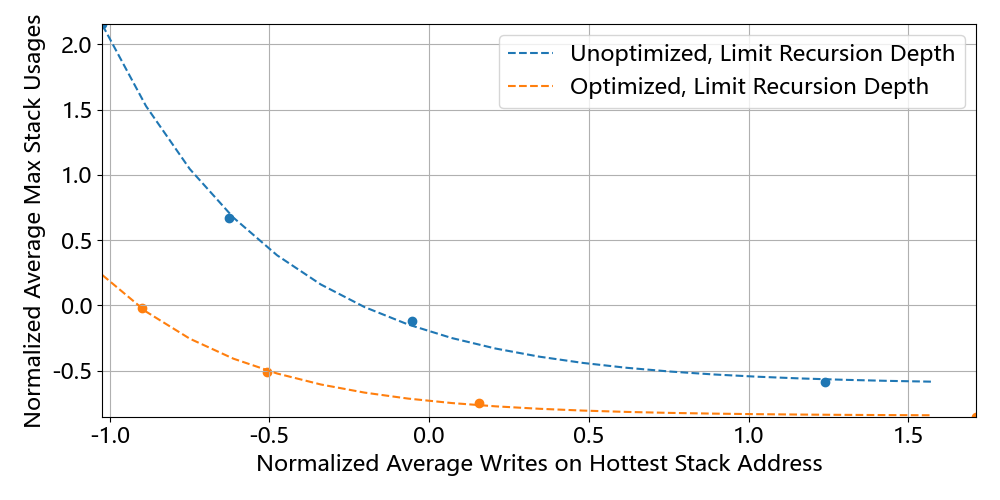

In [50]:
average_maximum_stack_usages_and_writes_on_hottest_stack_address_of_unoptimized_optimized_loop2recursion_under_different_recursion_depth_limits, ax = plt.subplots()

ax.scatter(
    normalized_average_unoptimized_loop2recursion_recursion_depth_limit_benchmark_writes_on_hottest_stack_addresses,
    normalized_average_unoptimized_loop2recursion_recursion_depth_limit_benchmark_max_stack_usages
)

ax.scatter(
    normalized_average_recursion_depth_limit_benchmark_writes_on_hottest_stack_addresses,
    normalized_average_recursion_depth_limit_benchmark_max_stack_usages
)

ax.plot(x, g(x, *normalized_average_unoptimized_loop2recursion_recursion_depth_limit_parameter_values), linestyle='dashed', label='Unoptimized, Limit Recursion Depth')
ax.plot(x, g(x, *normalized_average_recursion_depth_limit_parameter_values), linestyle='dashed', label='Optimized, Limit Recursion Depth')

ax.set_xlabel('Normalized Average Writes on Hottest Stack Address')
ax.set_ylabel('Normalized Average Max Stack Usages')

ax.legend()
ax.grid(True)

In [51]:
average_maximum_stack_usages_and_writes_on_hottest_stack_address_of_unoptimized_optimized_loop2recursion_under_different_recursion_depth_limits.savefig(
    'average_maximum_stack_usages_and_writes_on_hottest_stack_address_of_unoptimized_optimized_loop2recursion_under_different_recursion_depth_limits.pdf'
)